# Data Summary

anyonymous information collected from users who shorten website links ending with *.gov* or *.mil*

In [32]:
import pandas as pd
import numpy as np
import json
from collections import defaultdict
from collections import Counter
import seaborn as sns

In [4]:
path='/Users/sheilarosenberg/Downloads/pydata-book-2nd-edition/datasets/bitly_usagov/example.txt'

In [5]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [7]:
records=[json.loads(line) for line in open(path)]

In [8]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [10]:
time_zones=[rec['tz'] for rec in records if 'tz' in rec]

In [11]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [13]:
def get_counts2(sequence):
    counts=defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [14]:
counts2=get_counts2(time_zones)

In [15]:
counts2

defaultdict(int,
            {'America/New_York': 1251,
             'America/Denver': 191,
             'America/Sao_Paulo': 33,
             'Europe/Warsaw': 16,
             '': 521,
             'America/Los_Angeles': 382,
             'Asia/Hong_Kong': 10,
             'Europe/Rome': 27,
             'Africa/Ceuta': 2,
             'Europe/Madrid': 35,
             'Asia/Kuala_Lumpur': 3,
             'Asia/Nicosia': 1,
             'Europe/London': 74,
             'Pacific/Honolulu': 36,
             'America/Chicago': 400,
             'Europe/Malta': 2,
             'Europe/Lisbon': 8,
             'Europe/Paris': 14,
             'Europe/Copenhagen': 5,
             'America/Mazatlan': 1,
             'Europe/Dublin': 3,
             'Europe/Brussels': 4,
             'America/Vancouver': 12,
             'Europe/Amsterdam': 22,
             'Europe/Prague': 10,
             'Europe/Stockholm': 14,
             'America/Anchorage': 5,
             'Asia/Bangkok': 6,
         

In [16]:
len(time_zones)

3440

In [19]:
def top_counts(count_dict,n=10):
    value_key_pairs=[(count,tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [20]:
top_counts(counts2)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [22]:
counts3=Counter(time_zones)

In [23]:
counts3

Counter({'America/New_York': 1251,
         'America/Denver': 191,
         'America/Sao_Paulo': 33,
         'Europe/Warsaw': 16,
         '': 521,
         'America/Los_Angeles': 382,
         'Asia/Hong_Kong': 10,
         'Europe/Rome': 27,
         'Africa/Ceuta': 2,
         'Europe/Madrid': 35,
         'Asia/Kuala_Lumpur': 3,
         'Asia/Nicosia': 1,
         'Europe/London': 74,
         'Pacific/Honolulu': 36,
         'America/Chicago': 400,
         'Europe/Malta': 2,
         'Europe/Lisbon': 8,
         'Europe/Paris': 14,
         'Europe/Copenhagen': 5,
         'America/Mazatlan': 1,
         'Europe/Dublin': 3,
         'Europe/Brussels': 4,
         'America/Vancouver': 12,
         'Europe/Amsterdam': 22,
         'Europe/Prague': 10,
         'Europe/Stockholm': 14,
         'America/Anchorage': 5,
         'Asia/Bangkok': 6,
         'Europe/Berlin': 28,
         'America/Rainy_River': 25,
         'Europe/Budapest': 5,
         'Asia/Tokyo': 37,
         'Euro

In [24]:
counts3.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## Dataframe

In [25]:
df=pd.DataFrame(records)

In [26]:
df

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [29]:
df['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [30]:
tz_counts=df['tz'].value_counts()

In [31]:
tz_counts

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
Australia/Queensland       1
Europe/Sofia               1
America/Costa_Rica         1
America/Tegucigalpa        1
Name: tz, Length: 97, dtype: int64

In [33]:
clean_tz=df['tz'].fillna('Missing')

In [34]:
clean_tz[clean_tz=='']='Unknown'

In [35]:
tz_clean_counts=clean_tz.value_counts()

In [36]:
tz_clean_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [37]:
tz_clean_counts[0:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [38]:
subset_tz=tz_clean_counts[:10]

<AxesSubplot:>

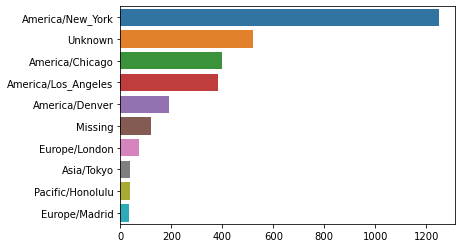

In [40]:
sns.barplot(y=subset_tz.index,x=subset_tz.values)

In [41]:
df['a'][1]

'GoogleMaps/RochesterNY'

In [42]:
df['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [43]:
df['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [44]:
df['a'][51][:50] #taking a subset of a long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [45]:
df['a'][51].split()

['Mozilla/5.0',
 '(Linux;',
 'U;',
 'Android',
 '2.2.2;',
 'en-us;',
 'LG-P925/V10e',
 'Build/FRG83G)',
 'AppleWebKit/533.1',
 '(KHTML,',
 'like',
 'Gecko)',
 'Version/4.0',
 'Mobile',
 'Safari/533.1']

In [46]:
results=pd.Series([x.split()[0] for x in df.a.dropna()])

In [47]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [49]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

# Decompose top time zones into windows and non-windows users

In [50]:
cframe=df[df.a.notnull()]

In [51]:
cframe.shape

(3440, 18)

In [52]:
cframe[:5]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


## Make a column for indicating whether a row is a windows user or non-Windows user 

In [54]:
cframe['os']=np.where(cframe['a'].str.contains('Windows'),'Windows_user','Not_Windows_user')

/var/folders/69/rv5500wn1sd8s5pkfnfnkkq00000gn/T/ipykernel_22182/2494558115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe['os']=np.where(cframe['a'].str.contains('Windows'),'Windows_user','Not_Windows_user')


In [55]:
cframe['os'][:5]

0        Windows_user
1    Not_Windows_user
2        Windows_user
3    Not_Windows_user
4        Windows_user
Name: os, dtype: object

In [56]:
by_tz_os=cframe.groupby(['tz','os'])

In [57]:
by_tz_os

In [58]:
by_tz_os.size()

tz                 os              
                   Not_Windows_user    245
                   Windows_user        276
Africa/Cairo       Windows_user          3
Africa/Casablanca  Windows_user          1
Africa/Ceuta       Windows_user          2
                                      ... 
Europe/Warsaw      Windows_user         15
Europe/Zurich      Not_Windows_user      4
Pacific/Auckland   Not_Windows_user      3
                   Windows_user          8
Pacific/Honolulu   Windows_user         36
Length: 149, dtype: int64

In [59]:
by_tz_os.size().unstack()

os,Not_Windows_user,Windows_user
tz,,
,245.0,276.0
Africa/Cairo,NaN,3.0
Africa/Casablanca,NaN,1.0
Africa/Ceuta,NaN,2.0
Africa/Johannesburg,NaN,1.0
...,...,...
Europe/Volgograd,NaN,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,NaN


In [60]:
by_tz_os.size().unstack().fillna(0)

os,Not_Windows_user,Windows_user
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [60]:
by_tz_os.size().unstack().fillna(0)

os,Not_Windows_user,Windows_user
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [61]:
agg_counts_tz=by_tz_os.size().unstack().fillna(0)

In [62]:
agg_counts_tz[:10]

os,Not_Windows_user,Windows_user
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [69]:
agg_counts_tz.sum(2)

ValueError: No axis named 2 for object type DataFrame

*sum on aggregated counts*: the 0 and the 1 are for the tz and the os, the os is first in the unstacked table so counts by windows vs non-windows user are from sum(0), counts by tz (summed across both types of os) are sum(1)a

In [67]:
agg_counts_tz.sum(1)

tz
                       521.0
Africa/Cairo             3.0
Africa/Casablanca        1.0
Africa/Ceuta             2.0
Africa/Johannesburg      1.0
                       ...  
Europe/Volgograd         1.0
Europe/Warsaw           16.0
Europe/Zurich            4.0
Pacific/Auckland        11.0
Pacific/Honolulu        36.0
Length: 97, dtype: float64

In [68]:
agg_counts_tz.sum(0)

os
Not_Windows_user    1194.0
Windows_user        2246.0
dtype: float64

*argsort* method: sort and return array of the indices

In [63]:
indexer=agg_counts_tz.sum(1).argsort()

In [70]:
agg_counts_tz.sum(1).argsort()

tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64

In [64]:
indexer


tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64

In [65]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

*take* method: take the elements at these index positions

In [66]:
count_subset_tz=agg_counts_tz.take(indexer[-10:])
count_subset_tz

os,Not_Windows_user,Windows_user
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [72]:
agg_counts_tz.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [73]:
count_subset_tz1=count_subset_tz.stack()

In [74]:
count_subset_tz1.name='total'

In [75]:
count_subset_tz1

tz                   os              
America/Sao_Paulo    Not_Windows_user     13.0
                     Windows_user         20.0
Europe/Madrid        Not_Windows_user     16.0
                     Windows_user         19.0
Pacific/Honolulu     Not_Windows_user      0.0
                     Windows_user         36.0
Asia/Tokyo           Not_Windows_user      2.0
                     Windows_user         35.0
Europe/London        Not_Windows_user     43.0
                     Windows_user         31.0
America/Denver       Not_Windows_user    132.0
                     Windows_user         59.0
America/Los_Angeles  Not_Windows_user    130.0
                     Windows_user        252.0
America/Chicago      Not_Windows_user    115.0
                     Windows_user        285.0
                     Not_Windows_user    245.0
                     Windows_user        276.0
America/New_York     Not_Windows_user    339.0
                     Windows_user        912.0
Name: total, dtype: fl

In [76]:
count_subset_tz1=count_subset_tz1.reset_index()

In [77]:
count_subset_tz1

,tz,os,total
0,America/Sao_Paulo,Not_Windows_user,13.0
1,America/Sao_Paulo,Windows_user,20.0
2,Europe/Madrid,Not_Windows_user,16.0
3,Europe/Madrid,Windows_user,19.0
4,Pacific/Honolulu,Not_Windows_user,0.0
5,Pacific/Honolulu,Windows_user,36.0
6,Asia/Tokyo,Not_Windows_user,2.0
7,Asia/Tokyo,Windows_user,35.0
8,Europe/London,Not_Windows_user,43.0
9,Europe/London,Windows_user,31.0


In [78]:
count_subset_tz1[:10]

,tz,os,total
0,America/Sao_Paulo,Not_Windows_user,13.0
1,America/Sao_Paulo,Windows_user,20.0
2,Europe/Madrid,Not_Windows_user,16.0
3,Europe/Madrid,Windows_user,19.0
4,Pacific/Honolulu,Not_Windows_user,0.0
5,Pacific/Honolulu,Windows_user,36.0
6,Asia/Tokyo,Not_Windows_user,2.0
7,Asia/Tokyo,Windows_user,35.0
8,Europe/London,Not_Windows_user,43.0
9,Europe/London,Windows_user,31.0


<AxesSubplot:xlabel='total', ylabel='tz'>

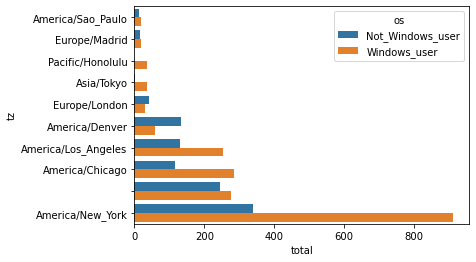

In [80]:
sns.barplot(x='total',y='tz',hue='os',data=count_subset_tz1)

normalize the group percentages to sum to 1 to make it easier to see the relative percentage of windows users in the smaller groups

In [81]:
def norm_total(group):
    group['normed_total']=group.total/group.total.sum()
    return group

In [82]:
tz_results_normalized=count_subset_tz1.groupby('tz').apply(norm_total)

In [83]:
tz_results_normalized

,tz,os,total,normed_total
0,America/Sao_Paulo,Not_Windows_user,13.0,0.393939
1,America/Sao_Paulo,Windows_user,20.0,0.606061
2,Europe/Madrid,Not_Windows_user,16.0,0.457143
3,Europe/Madrid,Windows_user,19.0,0.542857
4,Pacific/Honolulu,Not_Windows_user,0.0,0.000000
5,Pacific/Honolulu,Windows_user,36.0,1.000000
6,Asia/Tokyo,Not_Windows_user,2.0,0.054054
7,Asia/Tokyo,Windows_user,35.0,0.945946
8,Europe/London,Not_Windows_user,43.0,0.581081
9,Europe/London,Windows_user,31.0,0.418919


<AxesSubplot:xlabel='normed_total', ylabel='tz'>

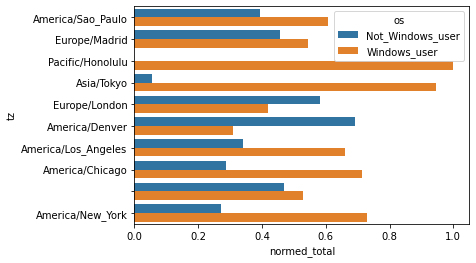

In [84]:
sns.barplot(x='normed_total',y='tz',hue='os',data=tz_results_normalized)

**could have computed the normalized sum(percentage of windows/non-windows users within each time zone) more efficiently by using the *transform* method with groupby as shown below**

In [85]:
g=count_subset_tz1.groupby('tz')

In [86]:
g

In [87]:
tz_results_normalized2=count_subset_tz1.total/g.total.transform('sum')

In [88]:
tz_results_normalized2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64